<center><img src="https://gitlab.com/accredian/insaid-data/-/raw/main/Logo-Accredian/Case-Study-Cropped.png" width= 30% /></center>

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
9. [**Summarization**](#Section9)</br>
  9.1 [**Conclusion**](#Section91)</br>
  9.2 [**Actionable Insights**](#Section91)</br>

---

---
<a name = Section1></a>
# **1. Introduction**
---

Exploratory Data Analysis (EDA) is a crucial step in data science and analytics projects. It involves summarizing the main characteristics of a dataset often using visual methods. This process helps to uncover patterns, spot anomalies, test hypotheses, and check assumptions with the help of summary statistics and graphical representations. In this analysis, we will conduct EDA on a dataset of 1000 movies, focusing on various attributes such as genre, release year, ratings, and revenue. The goal is to extract actionable insights that could inform decision-making processes in the film industry.

---
<a name = Section2></a>
# **2. Problem Statement**
---
<p align="center"><img src="https://webstockreview.net/images/cinema-clipart-cartoon-19.png"></p>



In 2017, a certain production company, ABC decides to produce movies that will earn the best in terms of revenue, popularity and acclaim. This company approaches agency, XYZ and asks them to come up with characteristics of movies that will help them achieve their purpose. Agency gives the task to me as a Data Scientist who is given the IMDB database of 1000 movies for the last 10 years (2006-2016). So, the task is come up with the characteristics of movies that earn:

The Highest Revenue<br/>
Popularity (IMDB Rating)<br/>
Critical Acclaim (Metacritic Rating)<br/>

The production company also wants to know whether this is the right time to invest in the movie industry and what strategy they should use to maximize benefits.

---
<a id = Section3></a>
# **3. Installing & Importing Libraries**

### **Importing Libraries**

- You can headstart with the basic libraries as imported inside the cell below.

- If you want to import some additional libraries, feel free to do so.


In [1]:
import numpy as np
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

import warnings
warnings.filterwarnings('ignore')

---
<a name = Section4></a>
# **4. Data Acquisition & Description**

In [2]:
data_url = 'https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv'
data_Movies = pd.read_csv(filepath_or_buffer = data_url)
print('Data Shape:', data_Movies.shape)
data_Movies.head()

Data Shape: (1000, 12)


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


### Brief about the fields in the dataset

|Id|Feature|Description|
|:--|:--|:--|
|01|Rank|Movie Rank| 
|02| Title | Title of the movie|  
|03| Genre | The various Genre that the movie can be associated with| 
|04| Description| Short description about the movie|   
|05| Director| Director of the movie|
|06| Actors| Main actors in the movie|
|07| Year| Year in which the movie was released|
|08| Runtime (minutes)| Total movie playing time|
|09| Rating | Movie rating|
|10| Votes| Vores for the movie|
|11| Revenue (Millions)| Revenue by the movie (in millions)|
|12| Metascore| Is the score of the movie on the metacritic website by critics|

### **Data Information & Description**

In [3]:
data_Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [4]:
data_Movies.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


---
<a name = Section6></a>
# **6. Data Pre-Processing**
---

- This section is emphasised on performing data manipulation over unstructured data for further processing and analysis.

- To modify unstructured data to strucuted data we need to verify and manipulate the integrity of the data by:
  - Handling missing data,

  - Handling redundant data,

  - Handling inconsistent data,

  - Handling outliers,

  - Handling typos

## Missing Data

We have missing data in two columns - Revenue & Metascore

In [5]:
(data_Movies.isnull().sum()/data_Movies.shape[0])*100

Rank                   0.0
Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64

### Revenue

From the data description we can see that Mean = 82.96 & Median = 47.98. So the distribution is skewed and also contains outliers (getting from the max value). Here we can replace the null values by Median.

In [6]:
median_Revenue = data_Movies['Revenue (Millions)'].median()
data_Movies['Revenue (Millions)'] = data_Movies['Revenue (Millions)'].fillna(median_Revenue)

### Metascore

From the data description we can see that Mean = 58.98 & Median = 59.5. So, we can say the distribution is normal and we can replace the missing values by mean.

In [7]:
mean_Revenue = data_Movies['Metascore'].median()
data_Movies['Metascore'] = data_Movies['Metascore'].fillna(mean_Revenue)

In [8]:
(data_Movies.isnull().sum()/data_Movies.shape[0])*100

Rank                  0.0
Title                 0.0
Genre                 0.0
Description           0.0
Director              0.0
Actors                0.0
Year                  0.0
Runtime (Minutes)     0.0
Rating                0.0
Votes                 0.0
Revenue (Millions)    0.0
Metascore             0.0
dtype: float64

## Addition of some fields

For the benefit of the analysis we will add some new columns. Those are
1. Genre_List
2. Genre_Compact (Example: where Genre is Romance, Drama; Genre_Compact = Genre 2
3. Actor_List
4. Runtime_levels

In [9]:
data_Movies['Genre_List'] = data_Movies['Genre'].apply(lambda x: x.split(','))
data_Movies['Genre_Compact'] = data_Movies['Genre_List'].apply(lambda x: 'Genre '+ str(len(x)))
data_Movies['Actor_List'] = data_Movies['Actors'].replace(', ',',')
data_Movies['Actor_List'] = data_Movies['Actor_List'].apply(lambda x: x.split(','))

---
<a name = Section7></a>
# **7. Data Post-Profiling**

In [10]:
data_Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  1000 non-null   float64
 11  Metascore           1000 non-null   float64
 12  Genre_List          1000 non-null   object 
 13  Genre_Compact       1000 non-null   object 
 14  Actor_List          1000 non-null   object 
dtypes: float64(3), int64(4), object(8)
memory usage: 117.3+ 

In [11]:
data_Movies.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,78.480040,59.018000
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,97.118097,16.635336
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.750000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,71.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [12]:
data_Movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Genre_List,Genre_Compact,Actor_List
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,"[Action, Adventure, Sci-Fi]",Genre 3,"[Chris Pratt, Vin Diesel, Bradley Cooper, Z..."
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,"[Adventure, Mystery, Sci-Fi]",Genre 3,"[Noomi Rapace, Logan Marshall-Green, Michael..."
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,"[Horror, Thriller]",Genre 2,"[James McAvoy, Anya Taylor-Joy, Haley Lu Ric..."
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,"[Animation, Comedy, Family]",Genre 3,"[Matthew McConaughey, Reese Witherspoon, Seth..."
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,"[Action, Adventure, Fantasy]",Genre 3,"[Will Smith, Jared Leto, Margot Robbie, Vio..."


---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---

- This section is emphasised on asking the right questions and perform analysis using the data.

- Note that there is no limit how deep you can go, but make sure not to get distracted from right track.

## Categorical (datatype = Object) vs Numerical Columns (datatype != Object)

Also under numerical fields we will not consider Year & Rank

In [13]:
categorical = data_Movies.select_dtypes(include='object').columns
numerical = data_Movies.select_dtypes(exclude='object').columns
categorical = list(categorical)
numerical = list(numerical)
numerical.remove('Rank')
numerical.remove('Year')

## Univariate Analysis

### Genre

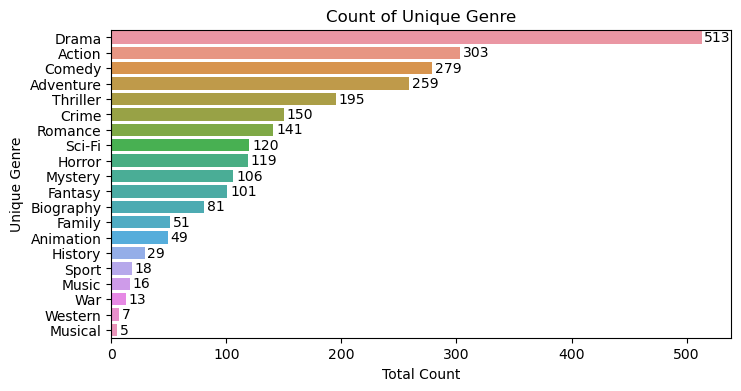

In [14]:
## List of Unique Genre & count in graphs
all_genres = [genre for sublist in data_Movies['Genre_List'] for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts()
genre_counts.index

plt.figure(figsize=(8,4))
ax = sns.barplot(x = genre_counts.values, 
                 y = genre_counts.index
                )
ax.bar_label(ax.containers[0], padding=2)
ax.set_xlabel('Total Count')
ax.set_ylabel('Unique Genre')
plt.title('Count of Unique Genre')
plt.show()

It can be seen that there are most movies with the genre of Drama followed by Comedy, Action, Crime and Adventure.

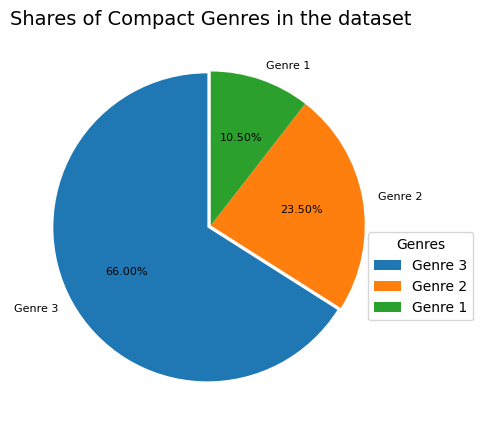

In [15]:
count_genre_compact = data_Movies['Genre_Compact'].value_counts()
count_genre_compact

plt.figure(figsize=(5,5))
plt.pie(count_genre_compact, 
        autopct='%.2f%%', 
        labels= count_genre_compact.index,
        explode=(0.025,0,0), 
        startangle=90, 
        textprops={'fontsize':8})
plt.legend(title = 'Genres', loc = 'upper right', bbox_to_anchor=(1.2, .5))
plt.title('Shares of Compact Genres in the dataset', fontdict={'fontsize':14})
plt.show()

It can be seen that there are a majority of movies that have a mixture of 3 various genres in the movie.

### Directors

#### Top 10 directors with most number of movies

In [16]:
movies_count_by_directors = data_Movies.Director.value_counts().head(10)

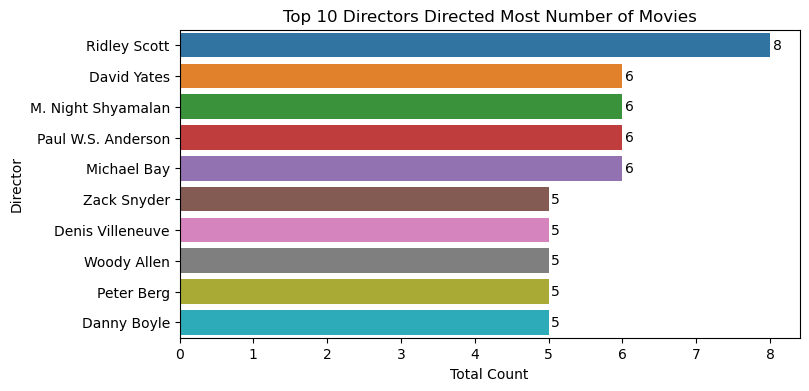

In [17]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x = movies_count_by_directors.values,
            y = movies_count_by_directors.index)
ax.bar_label(ax.containers[0], padding=2)
ax.set_xlabel('Total Count')
plt.title('Top 10 Directors Directed Most Number of Movies')
plt.show()

Ridley Scott is the only director made 8 movies (highest) followed by David Yates, M. Night Shayamalan, Paul Anderson & Mochael Bay (6 each)

### Actors

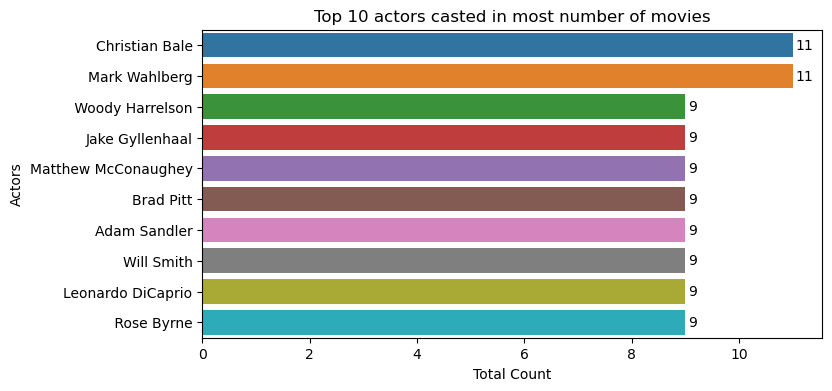

In [18]:
## List of Unique Genre
all_actors= [actor for sublist in data_Movies['Actor_List'] for actor in sublist]
actors_counts = pd.Series(all_actors).value_counts()
actors_counts_top10 = pd.Series(all_actors).value_counts().head(10)

plt.figure(figsize=(8,4))
ax = sns.barplot(x=actors_counts_top10.values,
                 y=actors_counts_top10.index)
ax.bar_label(ax.containers[0], padding=2)
ax.set_xlabel('Total Count')
ax.set_ylabel('Actors')
plt.title('Top 10 actors casted in most number of movies')
plt.show()

Christian Bale and Mark Wahlberg are casted in most number of movies

## Univariate Analysis of Numerical Fields

#### Distribution Nature

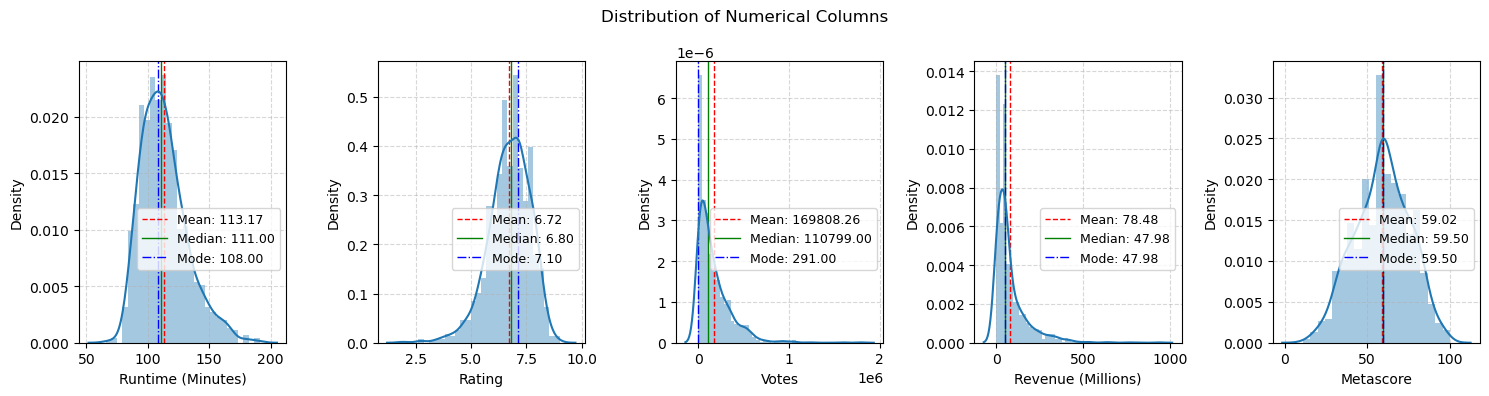

In [19]:
plt.figure(figsize=(15,4))
for i in range(len(numerical)):
    plt.subplot(1, len(numerical), i + 1)
    
    mean = data_Movies[numerical[i]].mean()
    median = data_Movies[numerical[i]].median()
    mode = data_Movies[numerical[i]].mode()[0]
    
    plt.axvline(mean, color='r', linestyle='--', linewidth=1, label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='g', linestyle='-', linewidth=1, label=f'Median: {median:.2f}')
    plt.axvline(mode, color='b', linestyle='-.', linewidth=1, label=f'Mode: {mode:.2f}')
    
    sns.distplot(x = data_Movies[numerical[i]])
    plt.grid(True, linestyle='dashed', alpha=0.5)
    plt.legend(loc='upper right',bbox_to_anchor=(0.5, 0., 0.5, 0.5),fontsize="9") 
    plt.xlabel(numerical[i])
plt.suptitle('Distribution of Numerical Columns')

plt.tight_layout()
plt.show()

#### Result : Distribution of Numerical Columns

Runtime : Normal distribution <br/>
Rating : Normal distribution <br/>
Votes : Skewed to right (Mean > Median) <br/>
Revenue : Skewed to right (Mean > Median) <br/>
Metascore : Normal distribution

#### Boxplot

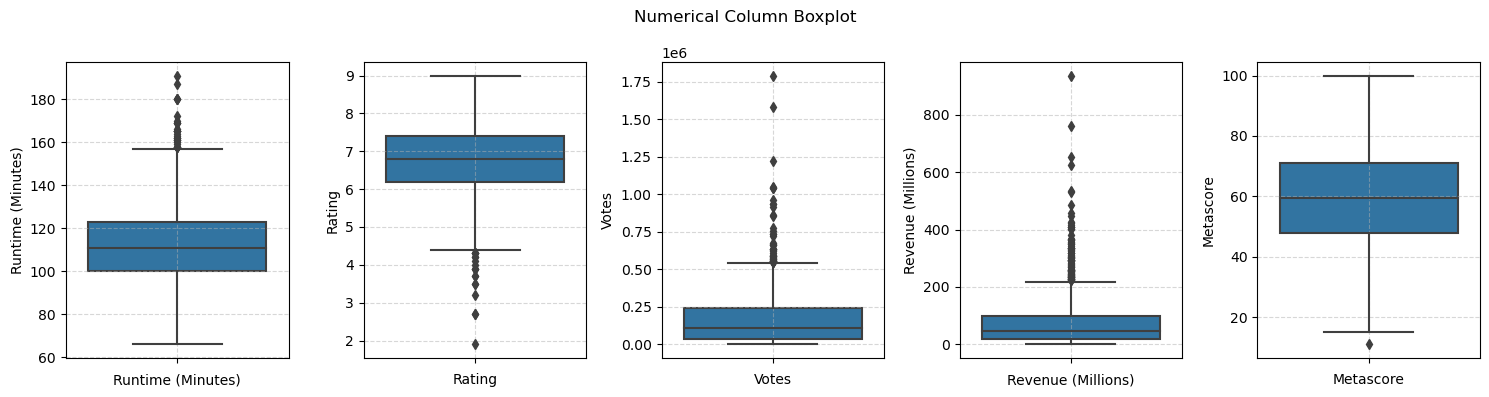

In [20]:
plt.figure(figsize=(15,4))
for i in range(len(numerical)):
    plt.subplot(1, len(numerical), i + 1)
    sns.boxplot(y= data_Movies[numerical[i]]) ##, color='#2a9d8f')
    plt.grid(True, linestyle='dashed', alpha=0.5)
    plt.xlabel(numerical[i])
plt.suptitle('Numerical Column Boxplot')

plt.tight_layout()
plt.show()

1. RunTime : Majority is b/w 100 - 122 Mins
2. Rating : Majority is b/w 6.1 to 7.4
3. Votes : Majority is b/w 0.01 to 0.25
4. Revenue : Majority is b/w 1 M to 100 M
5. Metascore : Majority is b/w 50 to 72

## Bivariate Analysis

#### Top 10 Movies with the Longest Runtime

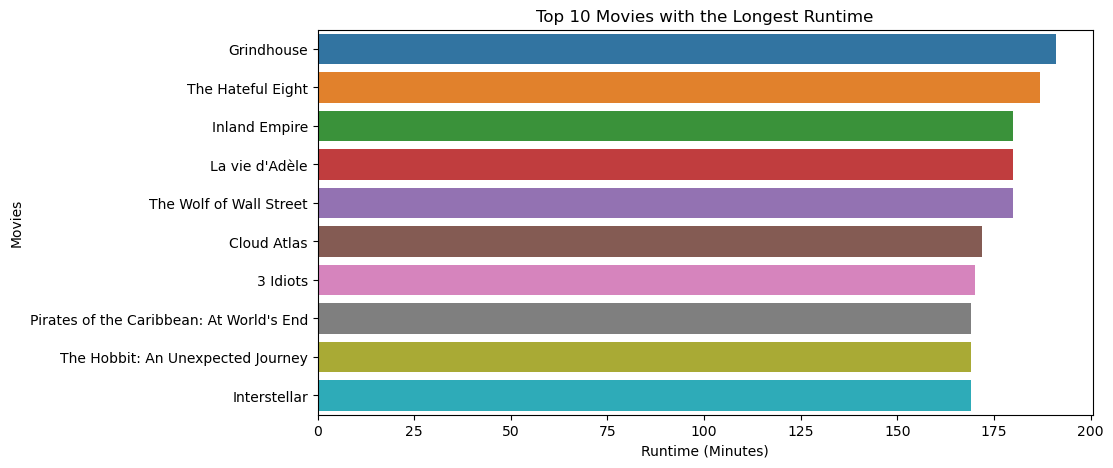

In [21]:
top10_longest = data_Movies[['Title','Runtime (Minutes)']].sort_values('Runtime (Minutes)', ascending=False).head(10)

plt.figure(figsize=(10,5))
ax = sns.barplot(x = top10_longest['Runtime (Minutes)'], 
                 y = top10_longest['Title']
                )
##ax.bar_label(ax.containers[0], padding=2)
ax.set_xlabel('Runtime (Minutes)')
ax.set_ylabel('Movies')
plt.title('Top 10 Movies with the Longest Runtime')
plt.show()

Grindhouse is the longest running movie

#### Top 10 Movies with Highest Rating

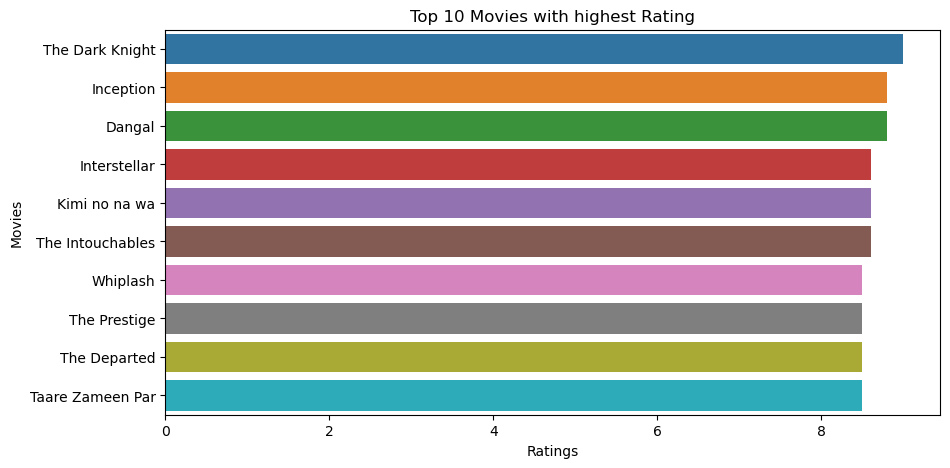

In [22]:
top10_highest_ratings = data_Movies[['Title','Rating']].sort_values('Rating', ascending=False).head(10)

plt.figure(figsize=(10,5))
ax = sns.barplot(x = top10_highest_ratings['Rating'], 
                 y = top10_highest_ratings['Title']
                )
##ax.bar_label(ax.containers[0], padding=2)
ax.set_xlabel('Ratings')
ax.set_ylabel('Movies')
plt.title('Top 10 Movies with highest Rating')
plt.show()

The Dark Knight got highest rating

#### Top 10 Movies with Highest Metascore

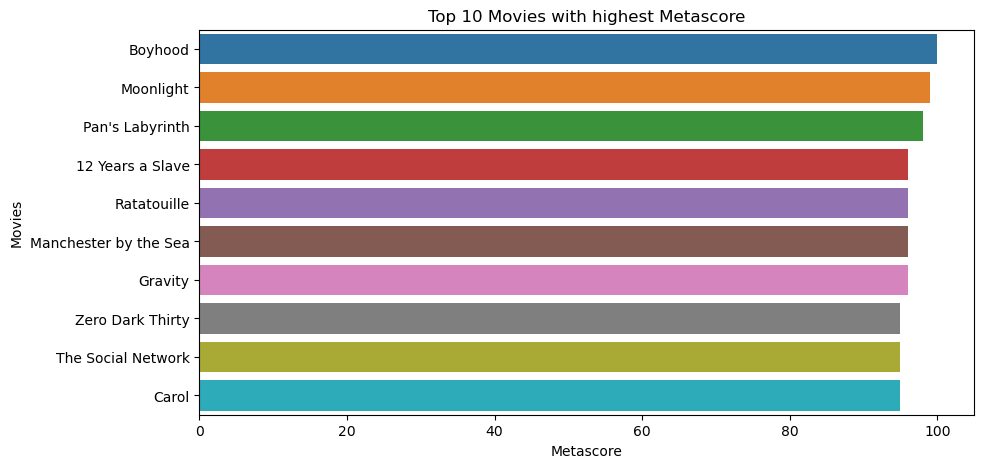

In [23]:
top10_highest_metascore = data_Movies[['Title','Metascore']].sort_values('Metascore', ascending=False).head(10)

plt.figure(figsize=(10,5))
ax = sns.barplot(x = top10_highest_metascore['Metascore'], 
                 y = top10_highest_metascore['Title']
                )
##ax.bar_label(ax.containers[0], padding=2)
ax.set_xlabel('Metascore')
ax.set_ylabel('Movies')
plt.title('Top 10 Movies with highest Metascore')
plt.show()

Boyhood got highest Metascore

#### Top 10 Movies with highest revenue

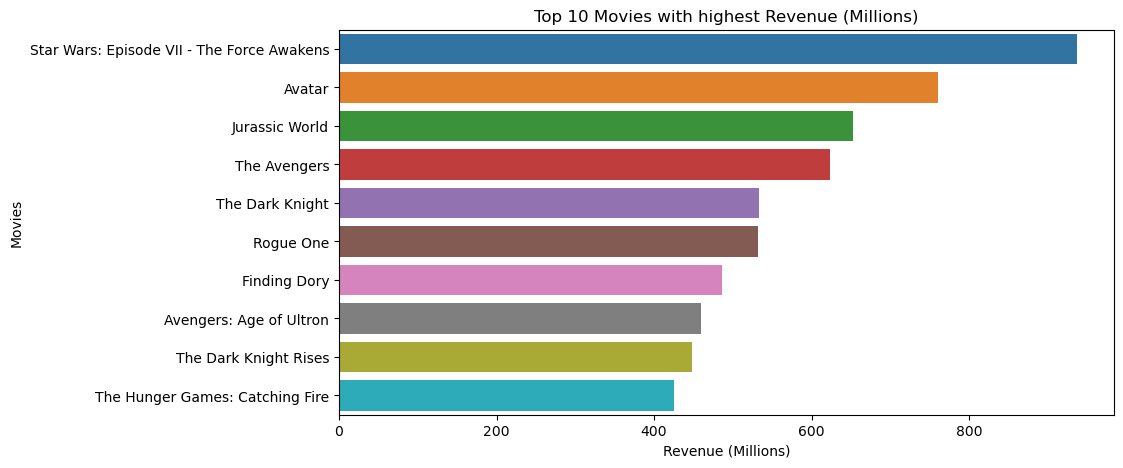

In [24]:
top10_highest_rev = data_Movies[['Title','Revenue (Millions)']].sort_values('Revenue (Millions)', ascending=False).head(10)

plt.figure(figsize=(10,5))
ax = sns.barplot(x = top10_highest_rev['Revenue (Millions)'], 
                 y = top10_highest_rev['Title']
                )
##ax.bar_label(ax.containers[0], padding=2)
ax.set_xlabel('Revenue (Millions)')
ax.set_ylabel('Movies')
plt.title('Top 10 Movies with highest Revenue (Millions)')
plt.show()

Star Wars: Episode VII - The Force Awakens generates highest revenue

## Multivariate Analysis

#### Correlation between all numerical columns

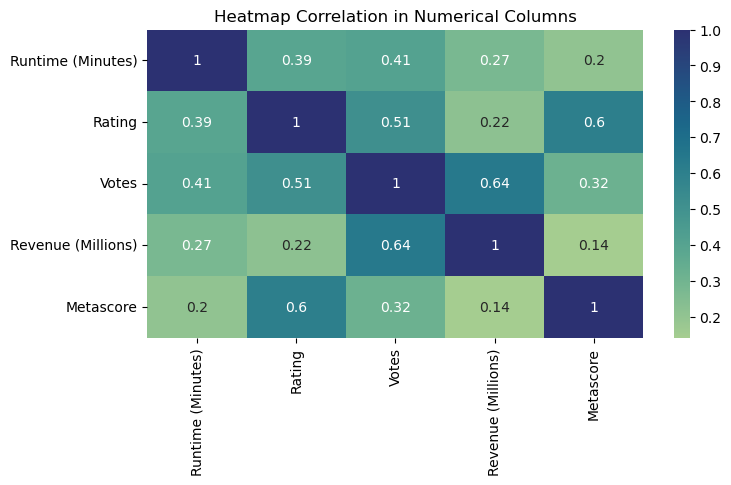

In [25]:
corr = data_Movies[numerical].corr()
plt.figure(figsize=(8,4))
sns.heatmap(corr, annot= True,cmap='crest')
plt.title('Heatmap Correlation in Numerical Columns')
plt.show()

Strong Corelation between
1. Votes & Revenue
2. Rating & Metascore

#### Votes & Revenue (Scatterplot)

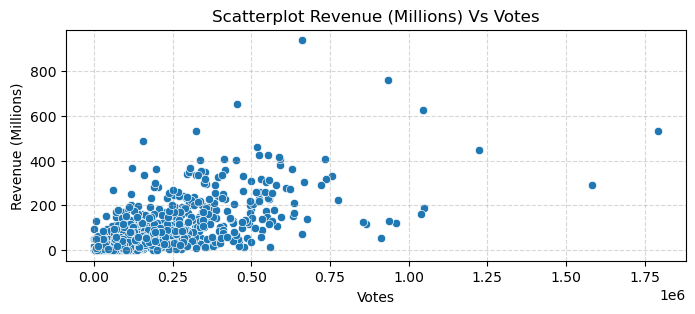

In [26]:
plt.figure(figsize=(8,3))
sns.scatterplot(data = data_Movies, x='Votes',y='Revenue (Millions)')
plt.grid(True, alpha=0.5, linestyle='dashed')
##plt.xlim(0,3000000)
plt.title('Scatterplot Revenue (Millions) Vs Votes')
plt.show()

This is not true that movies gained higher votes earn higher revenue.

#### Rating & Revenue (Scatterplot)

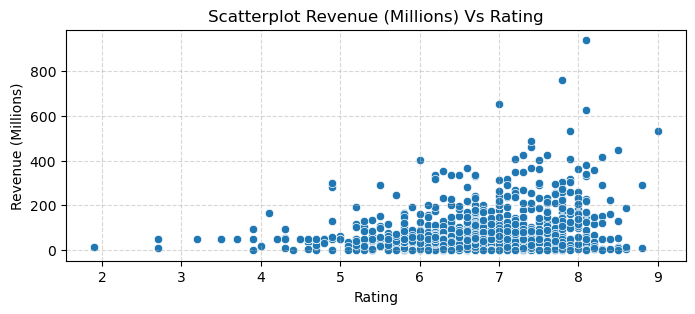

In [27]:
plt.figure(figsize=(8,3))
sns.scatterplot(data = data_Movies, x='Rating',y='Revenue (Millions)') ##'Revenue (Millions)'
plt.grid(True, alpha=0.5, linestyle='dashed')
##plt.xlim(0,3000000)
plt.title('Scatterplot Revenue (Millions) Vs Rating')
plt.show()

The higher the rating, the higher the Revenue

#### Multiple Genre Vs Votes and Metascore

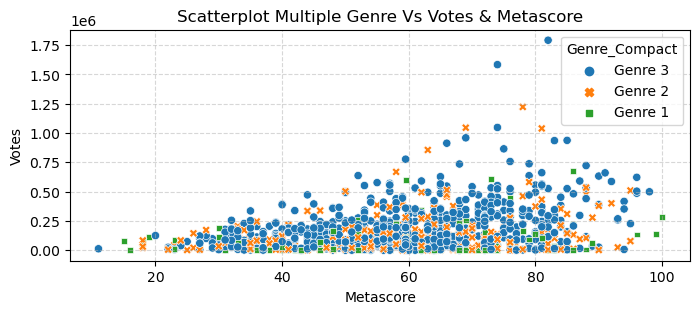

In [28]:
plt.figure(figsize=(8,3))
sns.scatterplot(data=data_Movies, y='Votes', hue='Genre_Compact', x='Metascore', style='Genre_Compact')
plt.grid(True, alpha=0.5, linestyle='dashed')
plt.title('Scatterplot Multiple Genre Vs Votes & Metascore')
plt.show()

It can be seen that even the highest Votes is not always high Metascore value, this can be seen votes more than 1.75 m but the Metascore is only about 83. But the small Metascore value is also in line with the small voting gain.

#### Pairplot

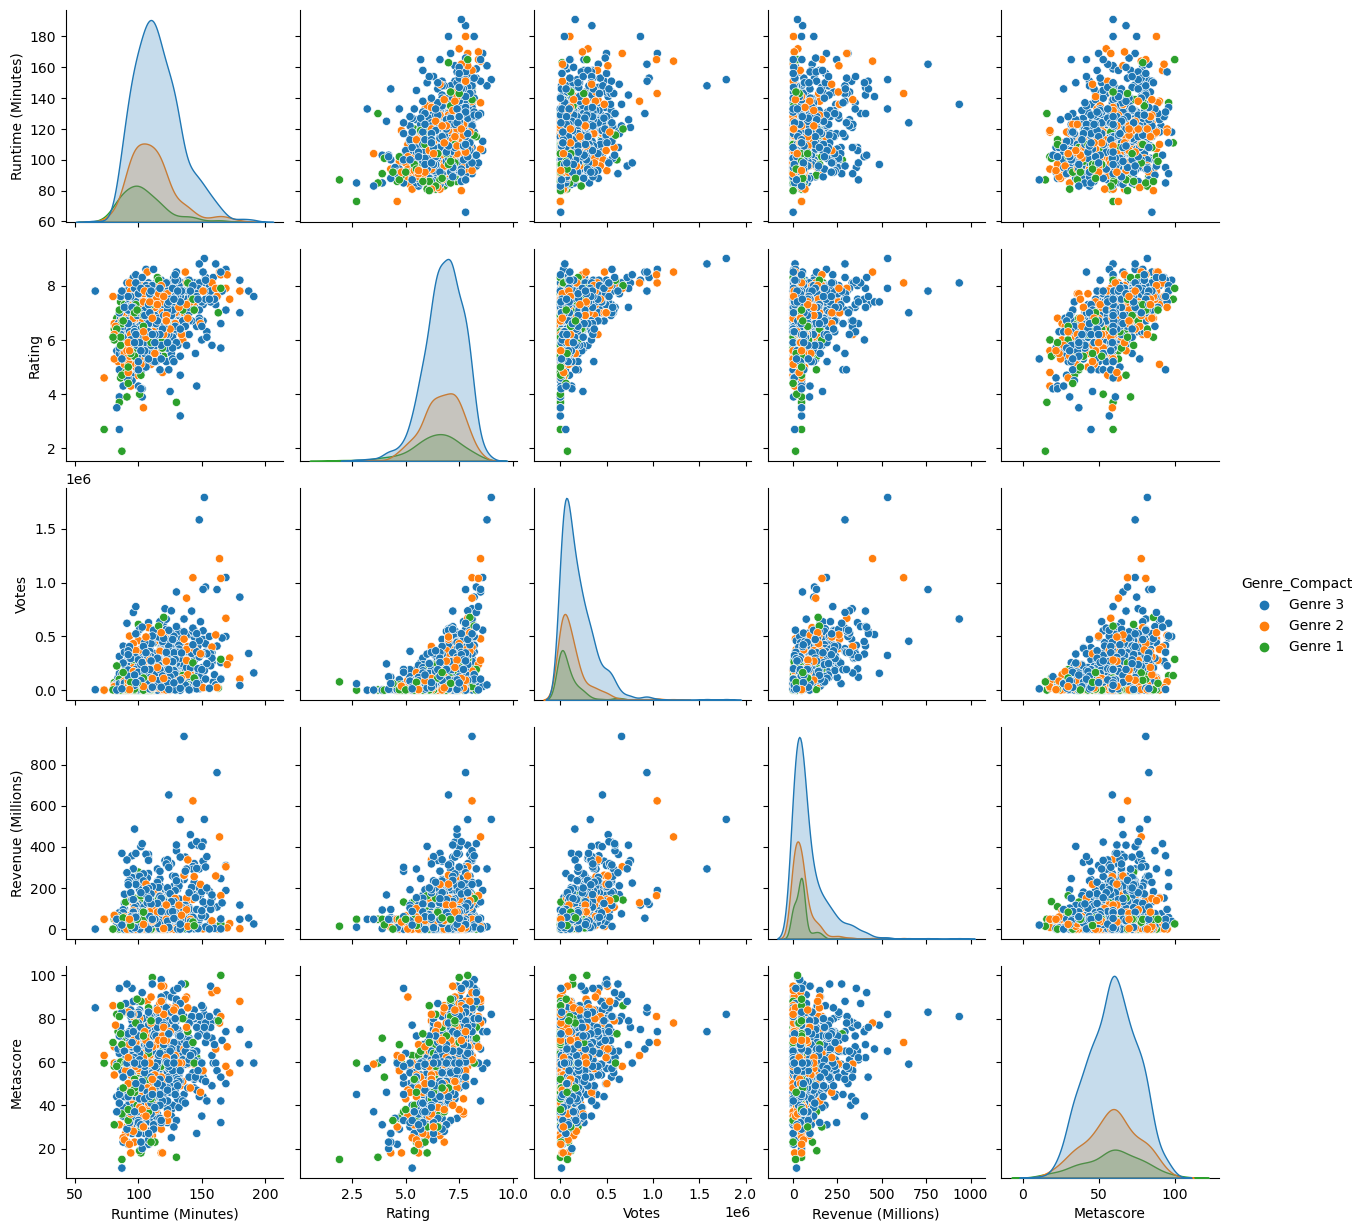

In [29]:
col_pairplot = numerical + ['Genre_Compact']

sns.pairplot(data_Movies[col_pairplot], hue='Genre_Compact')
plt.show()

#### Top 10 Directors who earned the highest Revenue from their movies

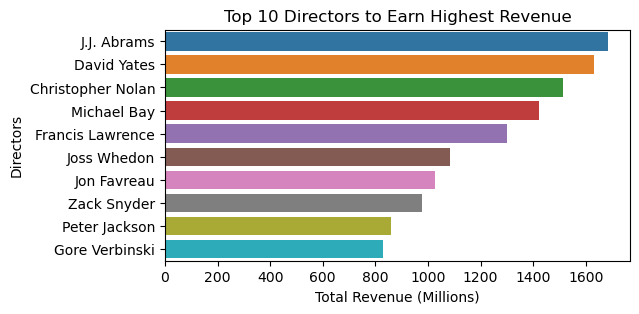

In [30]:
top10_director_highest_rev = data_Movies.groupby('Director')['Revenue (Millions)'].sum()

df_top10_director_highest_rev = pd.DataFrame({
    'Director' : top10_director_highest_rev.index,
    'TotalRevenue' : top10_director_highest_rev.values
})

df_top10_director_highest_rev = df_top10_director_highest_rev.sort_values('TotalRevenue',ascending=False).head(10)


plt.figure(figsize=(6,3))
ax = sns.barplot(x= df_top10_director_highest_rev.TotalRevenue,
                 y= df_top10_director_highest_rev.Director)
##ax.bar_label(ax.containers[0], padding=2)
ax.set_xlabel('Total Revenue (Millions)')
ax.set_ylabel('Directors')
plt.title('Top 10 Directors to Earn Highest Revenue')
plt.show()

So, J.J. Abrams is the director who earned the most revenue. Now let's check his share of revenues by movies

#### Movies by J.J Abrams

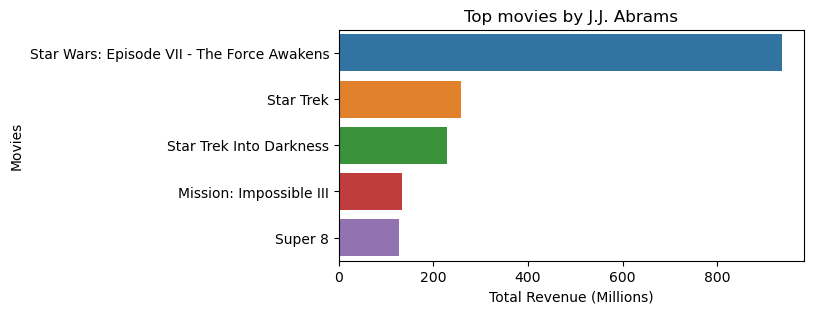

In [31]:
movies_jjabrams = data_Movies[['Director','Title','Revenue (Millions)']]
movies_jjabrams = movies_jjabrams[movies_jjabrams['Director'].str.contains('J.J. Abrams')]
movies_jjabrams = movies_jjabrams.sort_values('Revenue (Millions)',ascending = False)

plt.figure(figsize=(6,3))
ax = sns.barplot(x = movies_jjabrams['Revenue (Millions)'],
            y = movies_jjabrams['Title'])
##ax.bar_label(ax.containers[0], padding=2)
ax.set_xlabel('Total Revenue (Millions)')
ax.set_ylabel('Movies')
plt.title('Top movies by J.J. Abrams')
plt.show()

Among all the movies of J.J. Abrams, Star Wars: Episode VII - The Force Awakens

#### Relation between Genre (Length) and Revenue

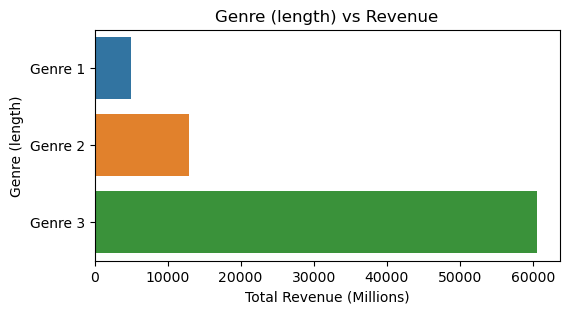

In [32]:
top10_genrecompact_highest_rev = data_Movies.groupby('Genre_Compact')['Revenue (Millions)'].sum().head(10)

plt.figure(figsize=(6,3))
ax = sns.barplot(x= top10_genrecompact_highest_rev.values,
                 y= top10_genrecompact_highest_rev.index)
##ax.bar_label(ax.containers[0], padding=2)
ax.set_xlabel('Total Revenue (Millions)')
ax.set_ylabel('Genre (length)')
plt.title('Genre (length) vs Revenue')
plt.show()

#### Relation between Genre (Length) and Rating

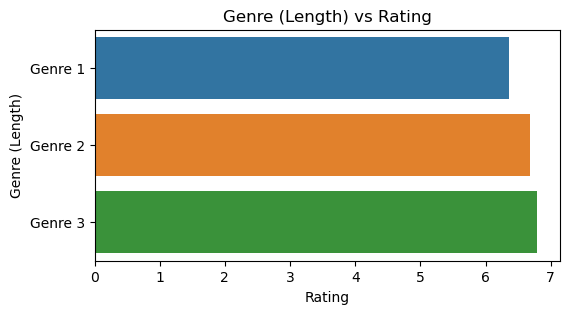

In [33]:
top10_genrecompact_avg_ratings = data_Movies.groupby('Genre_Compact')['Rating'].mean()

plt.figure(figsize=(6,3))
ax = sns.barplot(x= top10_genrecompact_avg_ratings.values,
                 y= top10_genrecompact_avg_ratings.index)
##ax.bar_label(ax.containers[0], padding=2)
ax.set_xlabel('Rating')
ax.set_ylabel('Genre (Length)')
plt.title('Genre (Length) vs Rating')
plt.show()

#### Relation between Genre Count and Metascore

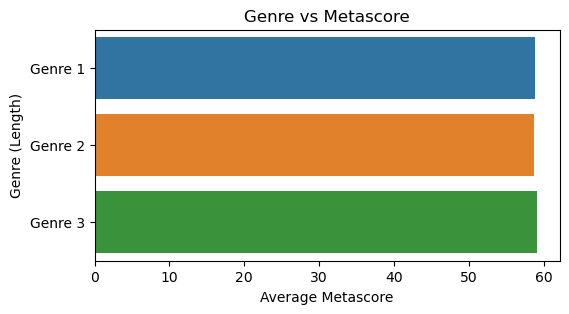

In [34]:
top10_genrecompact_avg_meta = data_Movies.groupby('Genre_Compact')['Metascore'].mean()

plt.figure(figsize=(6,3))
ax = sns.barplot(x= top10_genrecompact_avg_meta.values,
                 y= top10_genrecompact_avg_meta.index)
##ax.bar_label(ax.containers[0], padding=2)
ax.set_xlabel('Average Metascore')
ax.set_ylabel('Genre (Length)')
plt.title('Genre vs Metascore')
plt.show()

#### Top 10 Genre Combo to generate highest Revenue

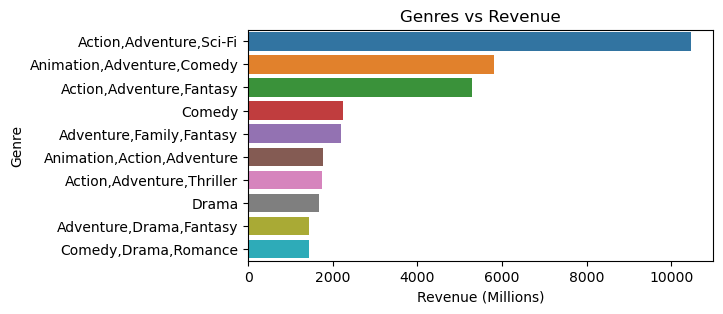

In [35]:
top10_genrecompact_highest_rev = data_Movies.groupby('Genre')['Revenue (Millions)'].sum()

df_top10_genrecompact_highest_rev = pd.DataFrame({
    'GenreCombination' : top10_genrecompact_highest_rev.index,
    'TotalRevenue' : top10_genrecompact_highest_rev.values
})

df_top10_genrecompact_highest_rev = df_top10_genrecompact_highest_rev.sort_values('TotalRevenue',ascending=False).head(10)

plt.figure(figsize=(6,3))
ax = sns.barplot(x= df_top10_genrecompact_highest_rev.TotalRevenue,
                 y= df_top10_genrecompact_highest_rev.GenreCombination)
##ax.bar_label(ax.containers[0], padding=2)
ax.set_xlabel('Revenue (Millions)')
ax.set_ylabel('Genre')
plt.title('Genres vs Revenue')
plt.show()

#### Top 10 Movies with Genre Action,Adventure,Sci-Fi

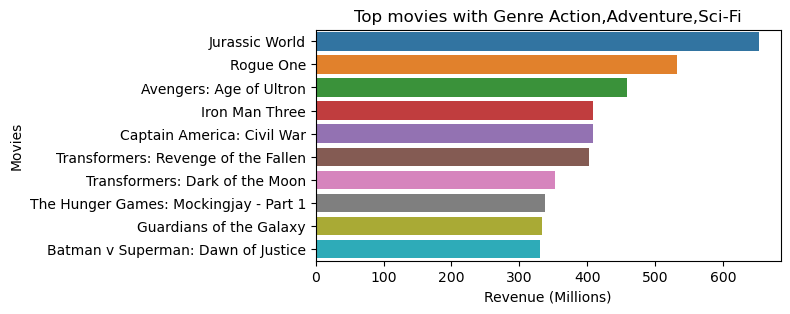

In [36]:
movies_top_genre = data_Movies[['Genre','Title','Revenue (Millions)']]
movies_top_genre = movies_top_genre[movies_top_genre['Genre'].str.contains('Action,Adventure,Sci-Fi')]
movies_top_genre = movies_top_genre.sort_values('Revenue (Millions)',ascending = False)
movies_top_genre = movies_top_genre.head(10)

plt.figure(figsize=(6,3))
ax = sns.barplot(x = movies_top_genre['Revenue (Millions)'],
            y = movies_top_genre['Title'])
##ax.bar_label(ax.containers[0], padding=2)
ax.set_xlabel('Revenue (Millions)')
ax.set_ylabel('Movies')
plt.title('Top movies with Genre Action,Adventure,Sci-Fi')
plt.show()

#### Top 10 Genre Combo to get Highest Average Ratings

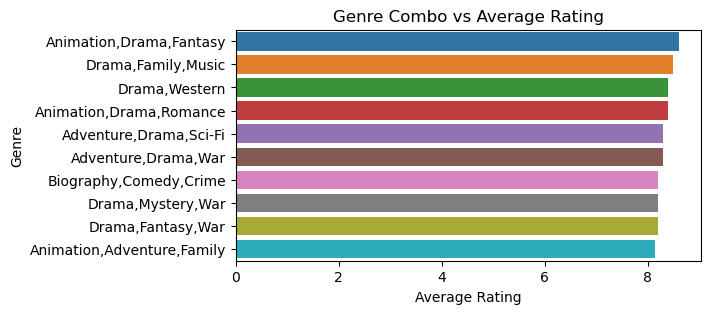

In [37]:
top10_genrecombo_avg_ratings = data_Movies.groupby('Genre')['Rating'].mean()


df_top10_genrecombo_avg_ratings = pd.DataFrame({
    'GenreCombination' : top10_genrecombo_avg_ratings.index,
    'AvgRatings' : top10_genrecombo_avg_ratings.values
})

df_top10_genrecombo_avg_ratings = df_top10_genrecombo_avg_ratings.sort_values('AvgRatings',ascending=False).head(10)

plt.figure(figsize=(6,3))
ax = sns.barplot(x= df_top10_genrecombo_avg_ratings.AvgRatings,
                 y= df_top10_genrecombo_avg_ratings.GenreCombination)
##ax.bar_label(ax.containers[0], padding=2)
ax.set_xlabel('Average Rating')
ax.set_ylabel('Genre')
plt.title('Genre Combo vs Average Rating')
plt.show()

#### Top 10 Genre Combo to get Highest Average Metascore

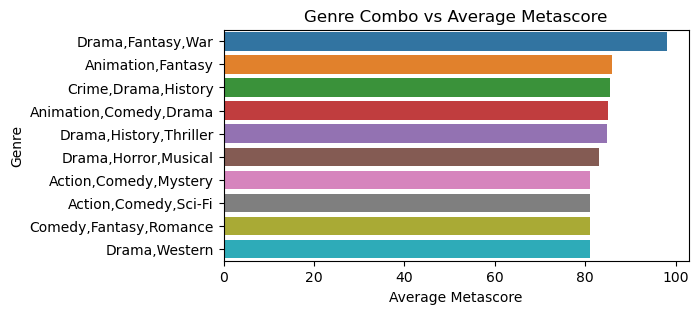

In [38]:
top10_genrecombo_avg_Metascore = data_Movies.groupby('Genre')['Metascore'].mean()


df_top10_genrecombo_avg_Metascore = pd.DataFrame({
    'GenreCombination' : top10_genrecombo_avg_Metascore.index,
    'AvgMetascore' : top10_genrecombo_avg_Metascore.values
})

df_top10_genrecombo_avg_Metascore = df_top10_genrecombo_avg_Metascore.sort_values('AvgMetascore',ascending=False).head(10)

plt.figure(figsize=(6,3))
ax = sns.barplot(x= df_top10_genrecombo_avg_Metascore.AvgMetascore,
                 y= df_top10_genrecombo_avg_Metascore.GenreCombination)
##ax.bar_label(ax.containers[0], padding=2)
ax.set_xlabel('Average Metascore')
ax.set_ylabel('Genre')
plt.title('Genre Combo vs Average Metascore')
plt.show()

#### Yearwise Count of Movies Released

Text(0, 0.5, 'Number of Movies Released')

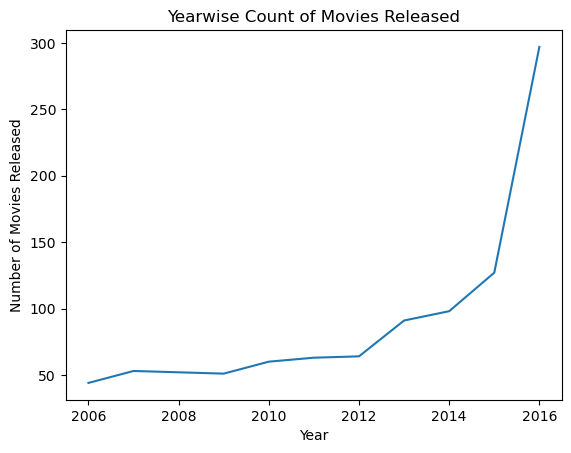

In [39]:
movies_year = data_Movies.groupby('Year')['Rank'].count()
ax = movies_year.plot.line();
ax.set_title('Yearwise Count of Movies Released')
ax.set_ylabel('Number of Movies Released')

---
<a name = Section9></a>
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**

- **Director**
1. Director with most number of movies directed : Ridely Scott (8 movies)
2. Director earned highest Revenue : J.J. Abrams (1683.45 millions)
3. Movie generated highest revenue for director who earned highest revenue : Star Wars: Episode VII - The Force Awakens (936.63 millions)


- **Movies**
1. Longest Runtime : Grindhouse (191 mins)
2. Highest Rating : The Dark Knight (9)
3. Highest Metascore : Boyhood (100)
3. Star Wars: Episode VII - The Force Awakens (936 millions)

- **Genre**
1. Drama is the popular Genre.
2. As the Genre count increases in a movie, its Revenue, Rating and Metascore are on the rise.
3. Movies with the combo Action, Adventure & Sci-Fi generates highest revenue & among all the movies under this Genre, Jurassic World earned highest (652.18 millions)
4. Movies under the Genre Action, Drama & Fantasy are most loved by audience.

- **Growth of Industry**
1. Year by year the number of movies released and revenue earned is growing gradually.

- **Rating**
1. From the Correlation graph it is shown that the audiance rating (Rating) and critics rating (Metascore) are in same manner.
2. The movies gain more votes generates more revenue.

<a name = Section92></a>
### **9.2 Actionable Insights**

As per the trend the industry is growing day by day, it is not a good idea to bring one movie per year to the audiance. The whole scenario will be profitable with a a bunch of movies per year with best features. Best features are,

1. **Genre** : Since 'Drama' is the most popular genre, so production company can invest on this genre. More specifically, in the combo of genres like 'Action - Adventure - SciFi'.

2. **Directos** : The production should target the directors whose movies generated higher revenue. For example - J.J. Abrams, David Yates, Christopher Nolan.

3. **Actors** : The production company should work with the artist/group of artist who are featured in more movies.

4. **Customer Satisfaction** : For the customer satisfaction, production company should focus more on the genres which are generating higher revenue and getting higher ratings from audiance.